In [1]:
import numpy as np
import pandas as pd
import cv2

In [2]:
df=pd.read_csv('../input/facial-expression/fer2013.csv')

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
len(df.iloc[0]['pixels'].split())
# 48 * 48

2304

In [5]:
label_map =['Anger','Neutral','Fear','Happy','Sad','Surprise']

In [6]:
import matplotlib.pyplot as plt

In [7]:
img = df.iloc[0]['pixels'].split()

In [8]:
img =[int(i) for i in img]

In [9]:
type(img[0])

int

In [10]:
len(img)

2304

In [11]:
img = np.array(img)

In [12]:
img=img.reshape(48,48)

In [13]:
img.shape

(48, 48)

Text(0.5, 0, '0')

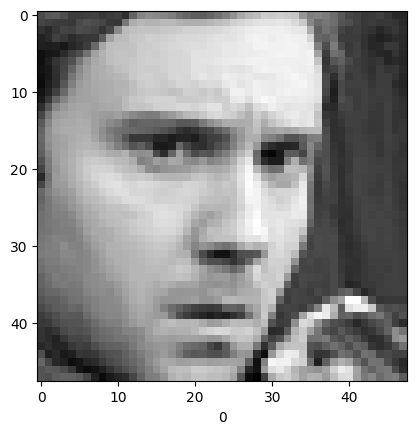

In [14]:
plt.imshow(img,cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [15]:
x=[]
y=[]


In [16]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y

In [17]:
X, y = getData('../input/facial-expression/fer2013.csv')

In [18]:
np.unique(y, return_counts=True)


(array([0, 2, 3, 4, 5, 6]), array([4001, 4001, 4001, 4001, 4001, 4001]))

In [19]:
X = np.array(X)/255.0
y = np.array(y)

In [20]:
X.shape, y.shape

((24006, 2304), (24006,))

In [21]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [22]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4001, 4001, 4001, 4001, 4001, 4001]))

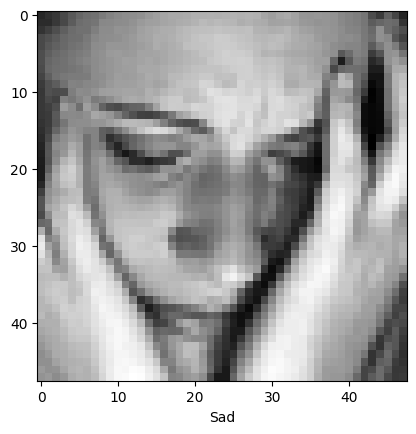

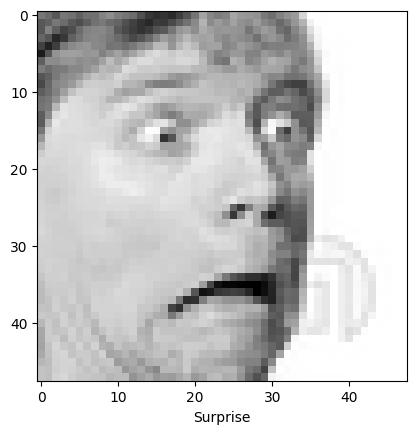

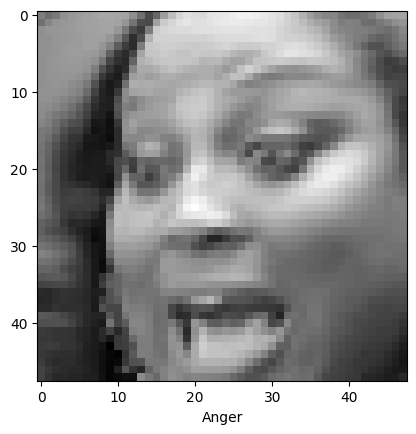

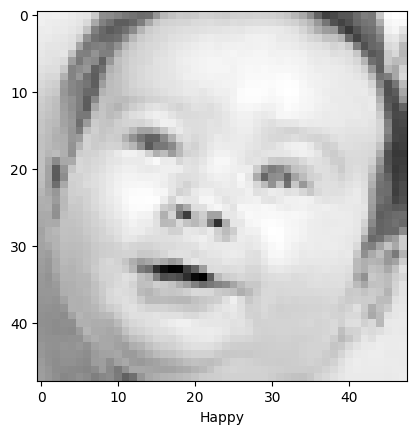

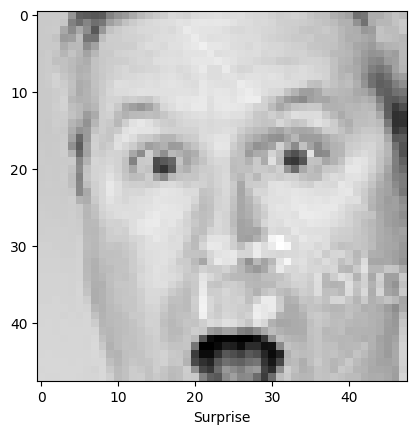

In [23]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [24]:
X = X.reshape(len(X), 48, 48, 1)

In [25]:
X.shape

(24006, 48, 48, 1)

In [26]:
from keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

In [27]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [28]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.]))

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.metrics import categorical_accuracy

In [30]:
pip install tensorflow


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [31]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Input

model = Sequential()

# Define input explicitly using Input layer
model.add(Input(shape=(48, 48, 1)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [32]:
import os
import absl.logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow INFO and WARNING
absl.logging.set_verbosity(absl.logging.ERROR)  # Suppress absl INFO logs

import tensorflow as tf

# Optionally restrict GPU usage
# tf.config.set_visible_devices([], 'GPU')

# Check GPU detection
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))


GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [33]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22


I0000 00:00:1733033458.257824      71 service.cc:145] XLA service 0x7ce3f80073a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733033458.257878      71 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  7/301 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.1745 - loss: 7.3716

I0000 00:00:1733033463.878625      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


301/301 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.2197 - loss: 2.7470 - val_accuracy: 0.0985 - val_loss: 2.6677
Epoch 2/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.2788 - loss: 1.9353 - val_accuracy: 0.2397 - val_loss: 2.2015
Epoch 3/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.3812 - loss: 1.5950 - val_accuracy: 0.1764 - val_loss: 2.7034
Epoch 4/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4277 - loss: 1.4621 - val_accuracy: 0.2849 - val_loss: 2.0669
Epoch 5/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4687 - loss: 1.3747 - val_accuracy: 0.3228 - val_loss: 1.7220
Epoch 6/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.5038 - loss: 1.2752 - val_accuracy: 0.4504 - val_loss: 1.3920
Epoch 7/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5329 - loss: 1.2064 - val_accuracy: 0.4840 - val_loss: 1.4025
Epoch 8/22
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5667 - loss: 1.1224 - val_accuracy: 0.49

In [34]:
model.save('model.h5')

In [35]:
import cv2

In [36]:
test_img = cv2.imread('/kaggle/input/fear-test/fear test.jpg', 0)

In [37]:
test_img.shape

(168, 300)

In [38]:
test_img = cv2.resize(test_img,(48,48))
test_img.shape

(48, 48)

In [39]:
test_img = test_img.reshape(1,48,48,1)

In [40]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [41]:
#label_map =['Anger','Neutral','Fear','Happy','Sad','Surprise']